In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nsl_kdd_dataset (1).csv to nsl_kdd_dataset (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Prompt user to upload the file
print("Please upload the 'nsl_kdd_dataset (1).csv' file.")
uploaded = files.upload()

# Get the actual uploaded filename. Assuming only one file is uploaded.
if not uploaded:
    raise FileNotFoundError("No file was uploaded.")

# Extract the first uploaded filename
uploaded_filename = list(uploaded.keys())[0]
print(f"File '{uploaded_filename}' successfully uploaded.")

# Load data and define DataFrame to ensure 'df' is available
data = pd.read_csv(uploaded_filename)
df = pd.DataFrame(data)

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'label' column
df['label_encoded'] = le.fit_transform(df['label'])

# Display the mapping of original labels to encoded labels
print("Original Labels to Encoded Labels Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# Display the first few rows with the new encoded column
display(df[['label', 'label_encoded']].head())

Please upload the 'nsl_kdd_dataset (1).csv' file.


Saving nsl_kdd_dataset (1).csv to nsl_kdd_dataset (1) (2).csv
File 'nsl_kdd_dataset (1) (2).csv' successfully uploaded.
Original Labels to Encoded Labels Mapping:
DoS: 0
Probe: 1
R2L: 2
U2R: 3
normal: 4


,label,label_encoded
0,U2R,3
1,normal,4
2,DoS,0
3,U2R,3
4,DoS,0


Now that the `label` column is encoded, you can proceed with further steps like:

1.  **Splitting the data**: Separate your features (X) from your target (y).
2.  **Feature Scaling**: Apply techniques like `StandardScaler` or `MinMaxScaler` to your numerical features.
3.  **Model Training**: Train a classification model (e.g., Logistic Regression, Decision Tree, Random Forest, SVM) for intrusion detection.

In [ ]:
data = pd.read_csv("nsl_kdd_dataset (1).csv")
data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.666287,0.577740,0.248644,0.039280,0.151331,0.441503,0.996257,0.739421,0.042406,0.244036,...,0.223672,0.336817,0.546493,0.529456,0.591125,0.470904,0.539593,0.518795,0.616669,U2R
1,0.143014,0.729235,0.539983,0.485997,0.055436,0.291892,0.143944,0.858332,0.304242,0.901082,...,0.610218,0.755973,0.713821,0.688312,0.311610,0.246923,0.600187,0.153257,0.676371,normal
2,0.401813,0.101389,0.961499,0.367041,0.133935,0.567280,0.080431,0.875795,0.603445,0.235740,...,0.077247,0.519867,0.716784,0.535350,0.711465,0.861131,0.122357,0.578372,0.511315,DoS
3,0.887278,0.168009,0.660708,0.656651,0.614879,0.400250,0.853977,0.907267,0.469452,0.998242,...,0.054651,0.465111,0.425285,0.847906,0.124342,0.096678,0.026864,0.574663,0.226657,U2R
4,0.360109,0.274258,0.064115,0.353499,0.531030,0.539846,0.001381,0.897988,0.350272,0.597418,...,0.118315,0.551459,0.166497,0.943283,0.372073,0.051407,0.983987,0.456051,0.746222,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,0.967352,0.342762,0.264209,0.198723,0.631247,0.603474,0.166970,0.436697,0.256032,0.550213,...,0.054503,0.094255,0.621130,0.075398,0.246599,0.105079,0.832495,0.682383,0.859576,normal
4426,0.520614,0.685581,0.890854,0.803042,0.834981,0.097507,0.893072,0.851633,0.492549,0.686107,...,0.625863,0.554713,0.342947,0.198001,0.596609,0.484180,0.481445,0.294098,0.243782,U2R
4427,0.144899,0.357244,0.050591,0.858876,0.801248,0.150603,0.362456,0.449716,0.779119,0.751988,...,0.291615,0.502770,0.478535,0.530647,0.489373,0.361806,0.160125,0.888664,0.557998,R2L
4428,0.073037,0.135551,0.391092,0.890727,0.048439,0.920886,0.820857,0.512095,0.816384,0.994678,...,0.797625,0.964145,0.915179,0.895851,0.942208,0.748008,0.299077,0.199395,0.093519,U2R


In [ ]:
data.info()
df = pd.DataFrame(data)
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430 entries, 0 to 4429
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     4430 non-null   float64
 1   protocol_type                4430 non-null   float64
 2   service                      4430 non-null   float64
 3   flag                         4430 non-null   float64
 4   src_bytes                    4430 non-null   float64
 5   dst_bytes                    4430 non-null   float64
 6   land                         4430 non-null   float64
 7   wrong_fragment               4430 non-null   float64
 8   urgent                       4430 non-null   float64
 9   hot                          4430 non-null   float64
 10  num_failed_logins            4430 non-null   float64
 11  logged_in                    4430 non-null   float64
 12  num_compromised              4430 non-null   float64
 13  root_shell        

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.666287,0.577740,0.248644,0.039280,0.151331,0.441503,0.996257,0.739421,0.042406,0.244036,...,0.223672,0.336817,0.546493,0.529456,0.591125,0.470904,0.539593,0.518795,0.616669,U2R
1,0.143014,0.729235,0.539983,0.485997,0.055436,0.291892,0.143944,0.858332,0.304242,0.901082,...,0.610218,0.755973,0.713821,0.688312,0.311610,0.246923,0.600187,0.153257,0.676371,normal
2,0.401813,0.101389,0.961499,0.367041,0.133935,0.567280,0.080431,0.875795,0.603445,0.235740,...,0.077247,0.519867,0.716784,0.535350,0.711465,0.861131,0.122357,0.578372,0.511315,DoS
3,0.887278,0.168009,0.660708,0.656651,0.614879,0.400250,0.853977,0.907267,0.469452,0.998242,...,0.054651,0.465111,0.425285,0.847906,0.124342,0.096678,0.026864,0.574663,0.226657,U2R
4,0.360109,0.274258,0.064115,0.353499,0.531030,0.539846,0.001381,0.897988,0.350272,0.597418,...,0.118315,0.551459,0.166497,0.943283,0.372073,0.051407,0.983987,0.456051,0.746222,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,0.967352,0.342762,0.264209,0.198723,0.631247,0.603474,0.166970,0.436697,0.256032,0.550213,...,0.054503,0.094255,0.621130,0.075398,0.246599,0.105079,0.832495,0.682383,0.859576,normal
4426,0.520614,0.685581,0.890854,0.803042,0.834981,0.097507,0.893072,0.851633,0.492549,0.686107,...,0.625863,0.554713,0.342947,0.198001,0.596609,0.484180,0.481445,0.294098,0.243782,U2R
4427,0.144899,0.357244,0.050591,0.858876,0.801248,0.150603,0.362456,0.449716,0.779119,0.751988,...,0.291615,0.502770,0.478535,0.530647,0.489373,0.361806,0.160125,0.888664,0.557998,R2L
4428,0.073037,0.135551,0.391092,0.890727,0.048439,0.920886,0.820857,0.512095,0.816384,0.994678,...,0.797625,0.964145,0.915179,0.895851,0.942208,0.748008,0.299077,0.199395,0.093519,U2R


In [ ]:
df.isnull()
df.isnull().sum()


,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
df.duplicated()
df.duplicated().sum()


np.int64(0)

In [ ]:
df["service"].fillna("Unknown")


/tmp/ipython-input-467598246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["service"].fillna("Unknown", inplace=True)


In [ ]:
avg = df["duration"].mean()
df["duration"] = df["duration"].fillna(avg)


/tmp/ipython-input-398334193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["duration"].fillna(avg, inplace=True)


In [ ]:
df.dropna()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.666287,0.577740,0.248644,0.039280,0.151331,0.441503,0.996257,0.739421,0.042406,0.244036,...,0.223672,0.336817,0.546493,0.529456,0.591125,0.470904,0.539593,0.518795,0.616669,U2R
1,0.143014,0.729235,0.539983,0.485997,0.055436,0.291892,0.143944,0.858332,0.304242,0.901082,...,0.610218,0.755973,0.713821,0.688312,0.311610,0.246923,0.600187,0.153257,0.676371,normal
2,0.401813,0.101389,0.961499,0.367041,0.133935,0.567280,0.080431,0.875795,0.603445,0.235740,...,0.077247,0.519867,0.716784,0.535350,0.711465,0.861131,0.122357,0.578372,0.511315,DoS
3,0.887278,0.168009,0.660708,0.656651,0.614879,0.400250,0.853977,0.907267,0.469452,0.998242,...,0.054651,0.465111,0.425285,0.847906,0.124342,0.096678,0.026864,0.574663,0.226657,U2R
4,0.360109,0.274258,0.064115,0.353499,0.531030,0.539846,0.001381,0.897988,0.350272,0.597418,...,0.118315,0.551459,0.166497,0.943283,0.372073,0.051407,0.983987,0.456051,0.746222,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,0.967352,0.342762,0.264209,0.198723,0.631247,0.603474,0.166970,0.436697,0.256032,0.550213,...,0.054503,0.094255,0.621130,0.075398,0.246599,0.105079,0.832495,0.682383,0.859576,normal
4426,0.520614,0.685581,0.890854,0.803042,0.834981,0.097507,0.893072,0.851633,0.492549,0.686107,...,0.625863,0.554713,0.342947,0.198001,0.596609,0.484180,0.481445,0.294098,0.243782,U2R
4427,0.144899,0.357244,0.050591,0.858876,0.801248,0.150603,0.362456,0.449716,0.779119,0.751988,...,0.291615,0.502770,0.478535,0.530647,0.489373,0.361806,0.160125,0.888664,0.557998,R2L
4428,0.073037,0.135551,0.391092,0.890727,0.048439,0.920886,0.820857,0.512095,0.816384,0.994678,...,0.797625,0.964145,0.915179,0.895851,0.942208,0.748008,0.299077,0.199395,0.093519,U2R


In [ ]:
df.to_csv("Cleaned_nsl_kdd_dataset (1).csv", index=False)
files.download("Cleaned_nsl_kdd_dataset (1).csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

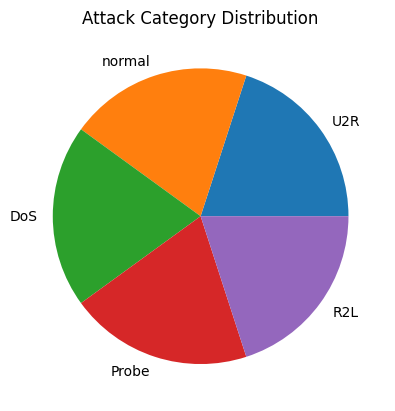

In [ ]:
plt.pie(df['label'].value_counts(),
        labels=df['label'].value_counts().index)
plt.title("Attack Category Distribution")
plt.show()

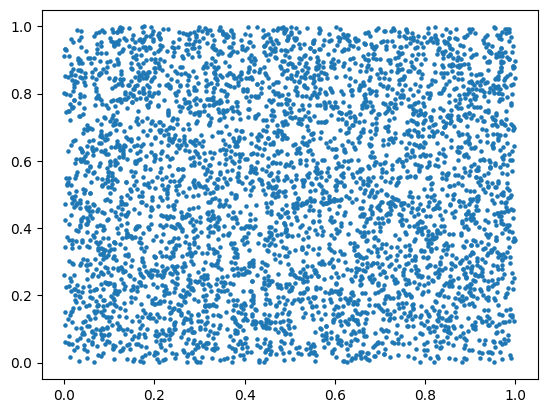

In [ ]:
plt.scatter(sample_df["duration"], sample_df["src_bytes"], s=5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

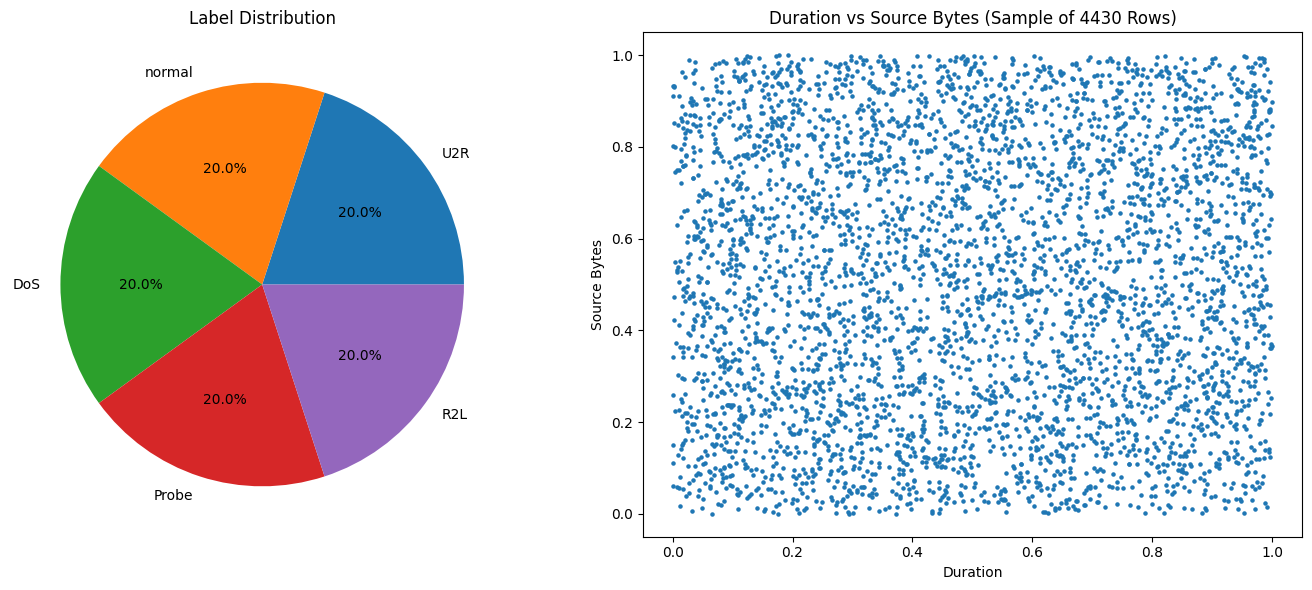

In [ ]:
plt.figure(figsize=(14,6))

# Pie chart
plt.subplot(1,2,1)
plt.pie(df["label"].value_counts(), labels=df["label"].unique(), autopct='%1.1f%%')
plt.title("Label Distribution")

# Scatter plot
plt.subplot(1,2,2)
sample_size = min(5000, df.shape[0]) # Adjust sample size to prevent error
sample_df = df.sample(n=sample_size)
plt.scatter(sample_df["duration"], sample_df["src_bytes"], s=5)
plt.title(f"Duration vs Source Bytes (Sample of {sample_size} Rows)")
plt.xlabel("Duration")
plt.ylabel("Source Bytes")

plt.tight_layout()
plt.savefig("Dashboard.png", dpi=300)
files.download("Dashboard.png")